In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

#プロット用です
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [3]:
from sklearn import metrics

In [4]:
import statsmodels.api as sm

In [5]:
def logistic(t):
    return 1.0/(1+math.exp(-1.0*t))

In [6]:
t = np.linspace(-6,6, 500)

In [7]:
y = np.array([logistic(ele) for ele in t])

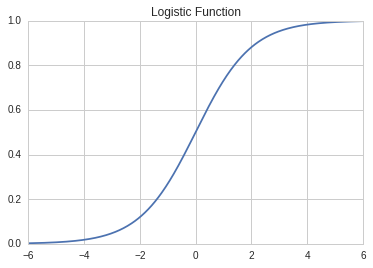

In [8]:
plt.plot(t,y)
plt.title('Logistic Function')

In [9]:
df = sm.datasets.fair.load_pandas().data

In [10]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [11]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [12]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


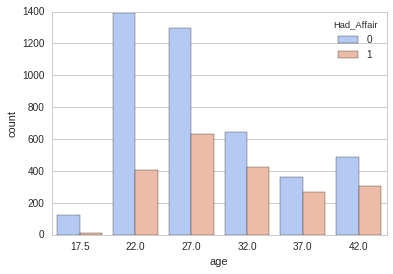

In [15]:
sns.countplot('age', data=df.sort('age'), hue='Had_Affair', palette='coolwarm')

/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


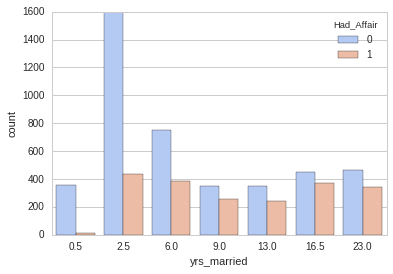

In [16]:
sns.countplot('yrs_married', data=df.sort('yrs_married'), hue='Had_Affair', palette='coolwarm')

/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


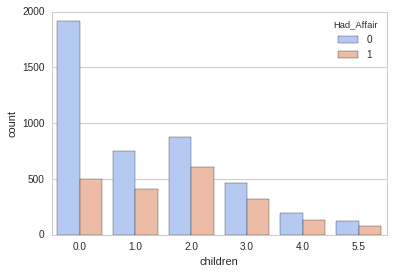

In [17]:
sns.countplot('children', data=df.sort('children'), hue='Had_Affair', palette='coolwarm')

In [18]:
occ_dummies = pd.get_dummies(df.occupation)

In [19]:
hus_occ_dummies = pd.get_dummies(df.occupation_husb)

In [20]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [22]:
X = df.drop(['occupation','occupation_husb','Had_Affair'], axis=1)

In [23]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [24]:
X = pd.concat([X, dummies], axis=1)

In [25]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
Y = df.Had_Affair

In [27]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [28]:
X = X.drop('occ1', axis=1)

In [29]:
X = X.drop('hocc1', axis=1)

In [30]:
X = X.drop('affairs', axis=1)

In [31]:
Y = np.ravel(Y)

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
log_model.score(X,Y)

0.72588752748978946

In [35]:
coffe_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [37]:
log_model2 = LogisticRegression()

In [38]:
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
class_predict = log_model2.predict(X_test)

In [42]:
class_predict

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
metrics.accuracy_score(Y_test, class_predict)

0.69912060301507539